# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import string
import matplotlib
import glob
from matplotlib import pyplot as plt

#import spacymoji
#from spacymoji import Emoji
from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords
from nltk.tokenize.casual import TweetTokenizer

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/users/drzag/anaconda3/509Mod6_Sentiment/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




## Read in the Lyrics Data

#### Having tried reading lyrics into both columns and rows, I generally preferred columns.  As you will see, I use column operations later to create the dataframe for sentiment analysis.

In [11]:
# Read in the Dido lyrics data

files_folder = "/users/drzag/lyrics/dido"
files = []
dido_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
dido_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES TO NEW DF
dido_titles = []
dido_titles = dido_files_df.loc[1, :].values.tolist()
dido_titles_df = pd.DataFrame(dido_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
dido_files_df = dido_files_df.iloc[2: , : ]

dido_files_df.head(5)

,All I See lyrics,All You Want lyrics,Blackbird lyrics,Burnin' Love lyrics,Cards lyrics,Chances lyrics,Closer lyrics,Clouds Like Islands lyrics,Day Before We Went To War lyrics,Don't Believe In Love lyrics,...,This Land Is Mine lyrics,Those Were The Days lyrics,Together lyrics,Us 2 Little Gods lyrics,Walking By lyrics,What Am I Doing Here lyrics,White Flag lyrics,Who Makes You Feel lyrics,Worthless lyrics,You Don't Need A God lyrics
2,(feat. Pete Miser),I'd like to watch you sleep at night,He put the coffee in the cup and with milk he ...,I found no peace,"Oh, baby, baby, baby",All I did today,So leave your taxi waiting,"Pine forests, clouds like islands",All the pictures on the wall,I wanna go to bed,...,From behind these walls I hear your song,We were kids,Ladies and gentlemen,"Walking home, burnt and red","Keep me locked up, keep me shut in",There's an empty seat next to me everywhere I go,"I know you think that I shouldn't still love you,",I don't touch you the way I used to,I know what you came for,I can hear the music
3,I thought it was done when I packed my bags an...,to hear you breathe by my side,He added sugar and I never knew he liked it li...,"In the lies that I've told,",What happened to those days,Was wake up and watch TV,And turn and close my door,Spanish boys on mopeds,The sand lying on the floor,With arms around me,...,"Oh, sweet words",We'd know it all,We have begun,Sticky thin he said,You can but my mind still roams free,Even on the plane and on the sofa back at home,Or tell you that.,I don't call and write when im away,And I know when you'll leave,Just a few notes from a passing car
4,I picked the books I thought I should and clos...,And though sleep leaves me behind,He took his coat from the hook and his scarf a...,I'm only hurt by the blows that get withheld,When the doors were always open,Another wasted day,And sit back down where you were sitting,Vodka shots and charcoal fires,The bed upstairs still unmade,But wake up on my own,...,The music that you play lights up my world,We will live,We don't need the news,Let us go down in the woods,You can keep me caged,Life's too short for all this time,"But if I didn't say it, well I'd still have fe...",We don't make love as often as we did do,You came for my heart,And they can take me
5,And when I handed back the keys I thought that...,there's nowhere I'd rather be,And he put down a key and said I won't be need...,The sharper I get cut,And the music always played?,But that's alright with me,A little closer than before,"Palm trees, heat on the asphalt",The dust float in the light,Pretend,...,The sweetest that Iâve heard,We will love forever more,Just need the weather,Can you be careful? she said,You can tell me to be quiet,We could have spent as two,Where's the sense in that?,what couldn't wait now waits and usually goes ...,And it's lost to me,With heart opening speed
6,"No shame, no dirt, no surprises wait for me",And now our bed is oh so cold,And he turned and smiled as if that explained ...,The harder I get held,"Do you remember, darling",When shadows turn to clouds,And when you look that serious,Larks and lizards and wasps in the grass,The people just left,That I'm still sleeping,...,Could it be that Iâve been touched and turned,We were blind,We can tell the time,Us 2 little gods with the world at our feet,But I remember everything,I've seen it and I've held it,I promise I'm not trying to make your life harder,But listen and think when I say it,For I won't stop you,To somewhere not here


In [12]:
# Read in the Above&Beyond lyrics data

files_folder = "/users/drzag/lyrics/abovebeyond"
files = []
ab_files_df = pd.DataFrame()

# Create a dataframe list and concatenate

files = [pd.read_csv(file, delimiter='\t') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
ab_files_df = pd.concat(files, axis = 1)

# EXTRACT TITLES ONLY
ab_titles = []
ab_titles = ab_files_df.loc[1, :].values.tolist()
ab_titles_df = pd.DataFrame(ab_titles, columns = ['titles'])

# DELETE UNNEEDED ROWS
ab_files_df = ab_files_df.iloc[2: , : ]

# DELETE DUPLICATE COLUMN
ab_files_df = ab_files_df.loc[:,~ab_files_df.columns.duplicated()]

ab_files_df.head()

,Air For Life lyrics,Alchemy lyrics,All Over The World lyrics,Almost Home lyrics,Alone Tonight lyrics,Alright Now lyrics,Alright Now (Above & Beyond Club Mix) lyrics,Always lyrics,Another Chance lyrics,Bittersweet & Blue lyrics,...,Sticky Fingers (Acoustic Version) lyrics,Sun & Moon lyrics,Sweetest Heart lyrics,Thing Called Love lyrics,Tightrope lyrics,Treasure lyrics,We're All We Need lyrics,With Your Hope lyrics,You Gotta Go lyrics,You Got To Go lyrics
2,NEED AIR FOR LIFE.....WE ALL BREATH.,(feat. Zoe Johnston),(feat. Alex Vargas),I am where I am,"Slipping sideways, silver stars collide",(feat. Justine Suissa),(with Justine Suissa),(feat. ZoÃ« Johnston),All I ask for is another chance,(feat. Richard Bedford),...,We painted the picture you want,(feat. Richard Bedford),(feat. ZoÃ« Johnston),(feat. Richard Bedford),When you're running out of tightrope,(feat. ZoÃ« Johnston),(feat. ZoÃ« Johnston),Connected to talk,"Dream on, little dreamer",(feat. Zoe Johnston)
3,NEED AIR FOR LIFE....NOW IN MY SOUL.,All these words you speak to me,Maybe I have waited for too long,Because I made it so,And fade away just like our love that died,I've lived a little,I've lived a little.,"Maybe, when I am hurting",All I ask for,I've got a photograph of you,...,I wanted it too,"It's raining, it's pouring",You have the sweetest heart,"There was a time, there was a place",And there's empty sky below,Treasure is measured in units of love,You tell me of a place you like to go,singing through a forest of ice,This is how it all begins,"Dream on, little dreamer! This is how it all b..."
4,NEED AIR FOREVER...,Are from a foreign land,Maybe I got caught up in the storm,I have ways to deceive myself,And there is nowhere in this universe to hide ...,I've loved a lot,I've loved a lot.,Maybe you will give a little time to me,All I ask for is another chance,Kept in a box of memories,...,But now there's something that I,A black sky is falling,NaN,But there was fear inside,Where'd you go?,Which means you may find you are rich,You say it will reach out and seize the sorrow,This slow motion moment is tumbling down,"Dream on, little dreamer",Move your feet ~ feel how sweet it is
5,IN ALL THAT I DO...,You're telling me that birds don't fly,And I sent you off so incomplete,And bind my soul,I've wrestled with angels all my life,I lost myself to you,I lost myself to you.,"And some day, when I really need you",All I ask for,And when I feel breakable,...,Would like you to do,It's cold tonight,NaN,A witty line to save my face,Please. Does anyone know?,Beyond your wildest dreams,And we always mean to act on what we say,Till we're lost inside the sound,This is how it all begins,"Dream on, little dreamer! Follow all of your s..."
6,NEED AIR FOR WHATEVER...THAT I DO.,How can it be that you love her?,Now your lonely call is haunting me,I was waiting to be found,It's always the halos and the wings that keep ...,We tied our dreams up,We tied our dreams up in a lovers knot,You will take me in your arms and you will say,I know the time will come,I take it out and look into your eyes,...,Get your sticky fingers out of my head,You gave me your answer,NaN,A parachute of pride,When you're running out of tightrope,Beyond your wildest dreams,"So come on, oh darling now... hurry, hurry, le...",It's your worst fall,Move your feet,You got to gather up what you need


## Function to Process Lyrics
Decision made to include the removal of stopwords since stopwords generally have no sentiment value and dilute the scores.

In [13]:
'''
Lyrics:
    Remove song titles
    Casefold to lowercase
    Remove punctuation
    Split on whitespace
    Remove stopwords (optional)
Removal of stopwords is up to you. 
Your descriptive statistic comparison will be different if you include stopwords,
though TF-IDF should still find interesting features for you.
'''

def lyric_pipeline(x):

    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)


In [14]:
for column in dido_files_df:
    dido_files_df[column] = dido_files_df[column].apply(str)
    dido_files_df[column] = dido_files_df[column].apply(lyric_pipeline)
dido_files_df

,All I See lyrics,All You Want lyrics,Blackbird lyrics,Burnin' Love lyrics,Cards lyrics,Chances lyrics,Closer lyrics,Clouds Like Islands lyrics,Day Before We Went To War lyrics,Don't Believe In Love lyrics,...,This Land Is Mine lyrics,Those Were The Days lyrics,Together lyrics,Us 2 Little Gods lyrics,Walking By lyrics,What Am I Doing Here lyrics,White Flag lyrics,Who Makes You Feel lyrics,Worthless lyrics,You Don't Need A God lyrics
2,[],"[id, like, watch, sleep, night]","[put, coffee, cup, milk, filled]","[found, peace]","[oh, baby, baby, baby]",[today],"[leave, taxi, waiting]","[pine, forests, clouds, like, islands]","[pictures, wall]","[wanna, go, bed]",...,"[behind, walls, hear, song]",[kids],"[ladies, gentlemen]","[walking, home, burnt, red]","[keep, locked, keep, shut]","[theres, empty, seat, next, everywhere, go]","[know, think, shouldnt, still, love]","[dont, touch, way, used]","[know, came]","[hear, music]"
3,"[thought, done, packed, bags, walked, light]","[hear, breathe, side]","[added, sugar, never, knew, liked, like]","[lies, ive, told]","[happened, days]","[wake, watch, tv]","[turn, close, door]","[spanish, boys, mopeds]","[sand, lying, floor]","[arms, around]",...,"[oh, sweet, words]","[wed, know]",[begun],"[sticky, thin, said]","[mind, still, roams, free]","[even, plane, sofa, back, home]",[tell],"[dont, call, write, im, away]","[know, youll, leave]","[notes, passing, car]"
4,"[picked, books, thought, closed, door, behind]","[though, sleep, leaves, behind]","[took, coat, hook, scarf, hat]","[im, hurt, blows, get, withheld]","[doors, always, open]","[another, wasted, day]","[sit, back, sitting]","[vodka, shots, charcoal, fires]","[bed, upstairs, still, unmade]",[wake],...,"[music, play, lights, world]",[live],"[dont, need, news]","[let, us, go, woods]","[keep, caged]","[lifes, short, time]","[didnt, say, well, id, still, felt]","[dont, make, love, often]","[came, heart]",[take]
5,"[handed, back, keys, thought, free]","[theres, nowhere, id, rather]","[put, key, said, wont, needing]","[sharper, get, cut]","[music, always, played]","[thats, alright]","[little, closer]","[palm, trees, heat, asphalt]","[dust, float, light]",[pretend],...,"[sweetest, iâve, heard]","[love, forever]","[need, weather]","[careful, said]","[tell, quiet]","[could, spent, two]","[wheres, sense]","[couldnt, wait, waits, usually, goes, away]",[lost],"[heart, opening, speed]"
6,"[shame, dirt, surprises, wait]","[bed, oh, cold]","[turned, smiled, explained]","[harder, get, held]","[remember, darling]","[shadows, turn, clouds]","[look, serious]","[larks, lizards, wasps, grass]","[people, left]","[im, still, sleeping]",...,"[could, iâve, touched, turned]",[blind],"[tell, time]","[us, 2, little, gods, world, feet]","[remember, everything]","[ive, seen, ive, held]","[promise, im, trying, make, life, harder]","[listen, think, say]","[wont, stop]",[somewhere]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
61,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
62,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
63,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [15]:
for column in ab_files_df:
    ab_files_df[column] = ab_files_df[column].apply(str)
    ab_files_df[column] = ab_files_df[column].apply(lyric_pipeline)
ab_files_df

,Air For Life lyrics,Alchemy lyrics,All Over The World lyrics,Almost Home lyrics,Alone Tonight lyrics,Alright Now lyrics,Alright Now (Above & Beyond Club Mix) lyrics,Always lyrics,Another Chance lyrics,Bittersweet & Blue lyrics,...,Sticky Fingers (Acoustic Version) lyrics,Sun & Moon lyrics,Sweetest Heart lyrics,Thing Called Love lyrics,Tightrope lyrics,Treasure lyrics,We're All We Need lyrics,With Your Hope lyrics,You Gotta Go lyrics,You Got To Go lyrics
2,"[need, air, lifewe, breath]",[],[],[],"[slipping, sideways, silver, stars, collide]",[],"[justine, suissa]",[],"[ask, another, chance]",[],...,"[painted, picture, want]",[],[],[],"[youre, running, tightrope]",[],[],"[connected, talk]","[dream, little, dreamer]",[]
3,"[need, air, lifenow, soul]","[words, speak]","[maybe, waited, long]",[made],"[fade, away, like, love, died]","[ive, lived, little]","[ive, lived, little]","[maybe, hurting]",[ask],"[ive, got, photograph]",...,[wanted],"[raining, pouring]","[sweetest, heart]","[time, place]","[theres, empty, sky]","[treasure, measured, units, love]","[tell, place, like, go]","[singing, forest, ice]",[begins],"[dream, little, dreamer, begins]"
4,"[need, air, forever]","[foreign, land]","[maybe, got, caught, storm]","[ways, deceive]","[nowhere, universe, hide, tonight]","[ive, loved, lot]","[ive, loved, lot]","[maybe, give, little, time]","[ask, another, chance]","[kept, box, memories]",...,"[theres, something]","[black, sky, falling]",[],"[fear, inside]","[whered, go]","[means, may, find, rich]","[say, reach, seize, sorrow]","[slow, motion, moment, tumbling]","[dream, little, dreamer]","[move, feet, feel, sweet]"
5,[],"[youre, telling, birds, dont, fly]","[sent, incomplete]","[bind, soul]","[ive, wrestled, angels, life]",[lost],[lost],"[day, really, need]",[ask],"[feel, breakable]",...,"[would, like]","[cold, tonight]",[],"[witty, line, save, face]","[please, anyone, know]","[beyond, wildest, dreams]","[always, mean, act, say]","[till, lost, inside, sound]",[begins],"[dream, little, dreamer, follow, signs]"
6,"[need, air, whateverthat]",[love],"[lonely, call, haunting]","[waiting, found]","[always, halos, wings, keep, blind]","[tied, dreams]","[tied, dreams, lovers, knot]","[take, arms, say]","[know, time, come]","[take, look, eyes]",...,"[get, sticky, fingers, head]","[gave, answer]",[],"[parachute, pride]","[youre, running, tightrope]","[beyond, wildest, dreams]","[come, oh, darling, hurry, hurry, lets, go]","[worst, fall]","[move, feet]","[got, gather, need]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,[],[],[],[],[],[],[],[],[],"[theyll, bittersweet, blue]",...,[],[],[],[],[],[],[],[],[],[]
59,[],[],[],[],[],[],[],[],[],"[bittersweet, blue]",...,[],[],[],[],[],[],[],[],[],[]
60,[],[],[],[],[],[],[],[],[],"[bittersweet, blue]",...,[],[],[],[],[],[],[],[],[],[]
61,[],[],[],[],[],[],[],[],[],[ooh],...,[],[],[],[],[],[],[],[],[],[]


## Concatenate lists from processing
### The following function uses column iteration to concatenate each lyric line into one list for each song.

In [9]:
dido_catalog_list_of_lists = []
for cols in dido_files_df:
    song_list_of_lists = dido_files_df[cols].to_list()
    song_one_list = []
    for list in song_list_of_lists:
        song_one_list += list
    dido_catalog_list_of_lists.append(song_one_list)
len(dido_catalog_list_of_lists)

83

In [16]:
ab_catalog_list_of_lists = []
for cols in ab_files_df:
    song_list_of_lists = ab_files_df[cols].to_list()
    song_one_list = []
    for list in song_list_of_lists:
        song_one_list += list
    ab_catalog_list_of_lists.append(song_one_list)
len(ab_catalog_list_of_lists)

63

## Generate list of song titles from column names

In [17]:
ab_song_list = ab_files_df.columns
dido_song_list = dido_files_df.columns

print(len(dido_song_list))
print(len(ab_song_list))
dido_song_list

83
63


Index(['All I See lyrics', 'All You Want lyrics', 'Blackbird lyrics',
       'Burnin' Love lyrics', 'Cards lyrics', 'Chances lyrics',
       'Closer lyrics', 'Clouds Like Islands lyrics',
       'Day Before We Went To War lyrics', 'Don't Believe In Love lyrics',
       'Don't Leave Home lyrics', 'Don't Think Of Me lyrics',
       'Do You Have A Little Time lyrics', 'End Of Night lyrics',
       'Everything To Lose lyrics',
       'Everything To Lose (Armin Van Buuren Remix) lyrics',
       'Fire And Rain lyrics', 'For One Day lyrics', 'Friends lyrics',
       'Girl Who Got Away lyrics', 'Give You Up lyrics', 'Go Dreaming lyrics',
       'Grafton Street lyrics', 'Happy New Year lyrics', 'Have To Stay lyrics',
       'Hell After This lyrics', 'Here With Me lyrics', 'Honestly OK lyrics',
       'Hunter lyrics', 'Hurricanes lyrics', 'If I Rise lyrics',
       'I'm No Angel lyrics', 'Isobel lyrics', 'It Comes And It Goes lyrics',
       'Just Because lyrics', 'Just Say Yes lyrics',
       '

## The folloing code creates a database for each song title and lyric list.

In [18]:
dido_lyrics = pd.DataFrame()
dido_lyrics['title']  = dido_song_list
dido_lyrics['lyrics'] = dido_catalog_list_of_lists
dido_lyrics.head(5)

,title,lyrics
0,All I See lyrics,"[thought, done, packed, bags, walked, light, p..."
1,All You Want lyrics,"[id, like, watch, sleep, night, hear, breathe,..."
2,Blackbird lyrics,"[put, coffee, cup, milk, filled, added, sugar,..."
3,Burnin' Love lyrics,"[found, peace, lies, ive, told, im, hurt, blow..."
4,Cards lyrics,"[oh, baby, baby, baby, happened, days, doors, ..."


In [19]:
ab_lyrics = pd.DataFrame()
ab_lyrics['title']  = ab_song_list
ab_lyrics['lyrics'] = ab_catalog_list_of_lists
ab_lyrics.head(5)

,title,lyrics
0,Air For Life lyrics,"[need, air, lifewe, breath, need, air, lifenow..."
1,Alchemy lyrics,"[words, speak, foreign, land, youre, telling, ..."
2,All Over The World lyrics,"[maybe, waited, long, maybe, got, caught, stor..."
3,Almost Home lyrics,"[made, ways, deceive, bind, soul, waiting, fou..."
4,Alone Tonight lyrics,"[slipping, sideways, silver, stars, collide, f..."


## Function to Import Twitter Followers into Dataframe

In [20]:
def follower_import(filenum):
    fol = pd.DataFrame()
    raw_file = os.listdir('C:/Users/drzag/twitter')[filenum]
    file = ('C:/Users/drzag/twitter/'+raw_file)
    fol = pd.read_csv(file, sep="\t", header=None)
    #CODE NOTE: "\t" was required to correctly read the file.
    fol.columns = ["name", "handle", "id_num", "loc", "date_joined", "followers", "friends", "desc"]
    fol['desc'] = fol['desc'].apply(str)
    fol.drop(fol[fol['desc'] == 'nan'].index, inplace = True)
    fol['desc_len'] = fol['desc'].str.len()
    return fol

print(os.listdir('C:/Users/drzag/twitter'))

['aboveandbeyond_followers.txt', 'didoofficial_followers.txt']


## Import Dido Follower Data w/ "follower_import()" Custom Function

In [21]:
dido_fol = follower_import(1)  # Argument is filenum in the directory: 0, 1, 2 etc
dido_fol.describe().T
print(dido_fol.info())
dido_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60699 entries, 0 to 100893
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         60686 non-null  object
 1   handle       60699 non-null  object
 2   id_num       60699 non-null  int64 
 3   loc          45836 non-null  object
 4   date_joined  60699 non-null  object
 5   followers    60699 non-null  int64 
 6   friends      60699 non-null  int64 
 7   desc         60699 non-null  object
 8   desc_len     60699 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.6+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,RenElDepre,ElRenirey,1368982010920898561,"Santiago, Chile",2021-03-08 17:48:50+00:00,10,195,Lo que me Apasiona 😇 Lo que me Divierte😎 Lo qu...,81
3,CrackinLeftF⚽⚽t,DavidMarcusBen1,1307948922191609857,NaN,2020-09-21 07:45:08+00:00,6,57,'Flawed Genuis',15
4,W.K BRIAN,WKBrian7,1483097247604609025,JINJA,2022-01-17 15:22:29+00:00,0,3,"SAXOPHONE PLAYER,GOSPEL MUSIC WRITER,SINGER AN...",56


## Import Above & Beyond Follower Data

In [22]:
ab_fol = follower_import(0)  
ab_fol.describe().T
print(ab_fol.info())
ab_fol.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65125 entries, 0 to 100889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         65098 non-null  object
 1   handle       65125 non-null  object
 2   id_num       65125 non-null  int64 
 3   loc          44805 non-null  object
 4   date_joined  65125 non-null  object
 5   followers    65125 non-null  int64 
 6   friends      65125 non-null  int64 
 7   desc         65125 non-null  object
 8   desc_len     65125 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 5.0+ MB
None


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len
0,DjSpace.booty,djspace_booty,1568710404314124288,"Los Angeles, CA",2022-09-10 21:18:25+00:00,3,35,LA DJ with a passion for house music & a nice ...,50
5,Felipe Rodrigues Figueiredo,FelipeR87147318,1568656781945061381,"São José do Rio Preto, Brasil",2022-09-10 17:46:38+00:00,3,331,See Off,7
6,Warner Powers,itswarnerpowers,1568338123477721089,NaN,2022-09-09 20:38:49+00:00,1,54,DJ & Producer,13


## Functions to tokenize the lyric data and the Twitter Data

In [24]:
'''
Lyrics:
    Remove song titles
    Casefold to lowercase
    Remove punctuation
    Split on whitespace
    Remove stopwords (optional)
Removal of stopwords is up to you. 
Your descriptive statistic comparison will be different if you include stopwords,
though TF-IDF should still find interesting features for you.
'''

def lyric_pipeline(x):

    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    #Split on whitespace AND Remove stopwords
    x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)

'''
Twitter Descriptions
    Casefold to lowercase
    Remove punctuation other than emojis or hashtags
    Split on whitespace
    Remove stopwords
Removing stopwords seems sensible for the Twitter description data.
Remember to leave in emojis and hashtags, since you analyze those. 
'''
    
def twitter_pipeline(x):

    #Remove punctuation characters
    x = x.translate(str.maketrans('', '', string.punctuation.replace("#","")))
    #Fold to lowercase
    x = x.lower()
    # starts with (feat.                #a few lyric began with a line for other featured artists
    x = re.sub(r'^(feat).*[a-z]$', ' ', x)
    # is nan
    x = re.sub(r'(nan)', ' ', x)
    
    # Use specialty tokenizer for Twitter emoji
    t = TweetTokenizer()
    x = t.tokenize(x)
    
    #from spacymoji import Emoji
    #nlp_spacymoji = spacy.load("en_core_web_sm")
    #emoji = Emoji(nlp_spacymoji, merge_spans=True)
    #nlp_spacymoji.add_pipe(emoji, first=True)
    #x = nlp_spacymoji(x)
    
    #Split on whitespace AND Remove stopwords
    #x = [w for w in x.split() if w not in (set(sw))]
    # USE THIS ONE FOR TOKENS
    return x
    # USE THIS ONE FOR STRING
    #return ' '.join(x)

'''
from spacymoji import Emoji
nlp_spacymoji = spacy.load("en_core_web_sm")
emoji = Emoji(nlp_spacymoji, merge_spans=True)
nlp_spacymoji.add_pipe(emoji, first=True)
x = nlp_spacymoji(x)

from nltk.tokenize.casual import TweetTokenizer
t = TweetTokenizer()
>>> t.tokenize(x)
'''


'\nfrom spacymoji import Emoji\nnlp_spacymoji = spacy.load("en_core_web_sm")\nemoji = Emoji(nlp_spacymoji, merge_spans=True)\nnlp_spacymoji.add_pipe(emoji, first=True)\nx = nlp_spacymoji(x)\n\nfrom nltk.tokenize.casual import TweetTokenizer\nt = TweetTokenizer()\n>>> t.tokenize(x)\n'

In [25]:
dido_fol['with_hashes'] = dido_fol['desc'].apply(twitter_pipeline)
dido_fol.dropna(inplace=True)
dido_fol.head(5)

,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes
0,RenElDepre,ElRenirey,1368982010920898561,"Santiago, Chile",2021-03-08 17:48:50+00:00,10,195,Lo que me Apasiona 😇 Lo que me Divierte😎 Lo qu...,81,"[lo, que, me, apasiona, 😇, lo, que, me, divier..."
4,W.K BRIAN,WKBrian7,1483097247604609025,JINJA,2022-01-17 15:22:29+00:00,0,3,"SAXOPHONE PLAYER,GOSPEL MUSIC WRITER,SINGER AN...",56,"[saxophone, playergospel, music, writersinger,..."
5,Claudia Rivera,drclamaria2023,1518593766332026880,Colombia,2022-04-25 14:13:27+00:00,2,62,"Psiquiatra independiente, madre amante de sus ...",72,"[psiquiatra, independiente, madre, amante, de,..."
6,Sean Toomey,toom57,149835666,"Greenwich, London",2010-05-30 10:31:07+00:00,200,818,I'm someone that enjoys life and smiles at eve...,108,"[im, someone, that, enjoys, life, and, smiles,..."
11,murry davidson🏴󠁧󠁢󠁳󠁣󠁴󠁿,murr61,33995610,"Dundee, Angus DD4 9AG",2009-04-21 18:43:00+00:00,492,2106,single parent/bonpo,19,"[single, parentbonpo]"


In [26]:
ab_fol['with_hashes'] = ab_fol['desc'].apply(twitter_pipeline)
ab_fol.dropna(inplace=True)
ab_fol.head(5)

,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes
0,DjSpace.booty,djspace_booty,1568710404314124288,"Los Angeles, CA",2022-09-10 21:18:25+00:00,3,35,LA DJ with a passion for house music & a nice ...,50,"[la, dj, with, a, passion, for, house, music, ..."
5,Felipe Rodrigues Figueiredo,FelipeR87147318,1568656781945061381,"São José do Rio Preto, Brasil",2022-09-10 17:46:38+00:00,3,331,See Off,7,"[see, off]"
10,kate ⭕️,dreamcranes,44555277,LDN,2009-06-04 05:40:11+00:00,71,104,I go hunting for witches / Heads are going to ...,50,"[i, go, hunting, for, witches, heads, are, goi..."
14,Scouse Wally,Scouse_2022,1566502960053555204,"Liverpool, England",2022-09-04 19:06:36+00:00,36,208,Back once again for the renegade master….,41,"[back, once, again, for, the, renegade, master..."
15,Conor Boyle,mk3y2k,1184308650,Tallahasse to Orlando,2013-02-16 01:48:10+00:00,18,189,Beat counter • Analogue asshole • World travel...,54,"[beat, counter, •, analogue, asshole, •, world..."


## Prepare the Lexicon Sentiment Dictionaries

In [27]:
'''
Citation for word list:
Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."
Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004)
Aug 22-25, 2004, Seattle, Washington, USA
'''
pos_score = 1
positive_words_dict = {}
positive_words = pd.read_csv('C:/Users/drzag/anaconda3/509Mod6_Sentiment/positive-words.txt', header = None, names=["pos"])
positive_words_list = positive_words['pos'].tolist()
for word in positive_words_list:
    positive_words_dict[word] = 1

print(f"There are {len(positive_words)} rows in the positive data.")
print(f"There are {positive_words['pos'].nunique()} unique words in the positive words.")
print(f"The dictionary is {len(positive_words_dict)} items long.")

There are 2006 rows in the positive data.
There are 2006 unique words in the positive words.
The dictionary is 2006 items long.


In [28]:
'''
Citation for word list:
Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."
Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD-2004)
Aug 22-25, 2004, Seattle, Washington, USA
'''

neg_score = -1
negative_words_dict = {}
negative_words = pd.read_csv('C:/Users/drzag/anaconda3/509Mod6_Sentiment/negative-words.txt', header = None, names=["neg"])
negative_words_list = negative_words['neg'].tolist()
for word in negative_words_list:
    negative_words_dict[word] = 1

print(f"There are {len(negative_words)} rows in the negative data.")
print(f"There are {negative_words['neg'].nunique()} unique words in the negative words.")
print(f"The dictionary is {len(negative_words_dict)} items long.")

There are 4783 rows in the negative data.
There are 4783 unique words in the negative words.
The dictionary is 4783 items long.


In [29]:
neg_score = -1
positive_tidytext_dict = {}
negative_tidytext_dict = {}
tidytext = pd.read_csv('C:/Users/drzag/anaconda3/509Mod6_Sentiment/tidytext_sentiments.txt',
                       sep = '\t',
                       header = 0, 
                       names=["word", "sent", "source"])
print(f"There are {len(tidytext)} rows in the data.")
print(f"There are {tidytext['word'].nunique()} unique words in the data.")

negative_tidytext = tidytext[tidytext['sent'] == "negative"].reset_index(drop=True)
negative_tidytext = pd.DataFrame(negative_tidytext['word'])
negative_tidytext_list = negative_tidytext['word'].tolist()
for word in negative_tidytext_list:
    negative_tidytext_dict[word] = -1

print(f"There are {len(negative_tidytext)} rows in the negative data.")
print(f"There are {negative_tidytext['word'].nunique()} unique words in the negative words.")
print(f"The dictionary is {len(negative_tidytext_dict)} items long.")

positive_tidytext = tidytext[tidytext['sent'] == "positive"].reset_index(drop=True)
positive_tidytext = pd.DataFrame(positive_tidytext['word'])
positive_tidytext_list = positive_tidytext['word'].tolist()

for word in positive_tidytext_list:
    positive_tidytext_dict[word] = 1

print(f"There are {len(positive_tidytext)} rows in the positive data.")
print(f"There are {positive_tidytext['word'].nunique()} unique words in the positive words.")
print(f"The dictionary is {len(positive_tidytext_dict)} items long.")

There are 15133 rows in the data.
There are 11407 unique words in the data.
There are 10461 rows in the negative data.
There are 7760 unique words in the negative words.
The dictionary is 7760 items long.
There are 4672 rows in the positive data.
There are 3778 unique words in the positive words.
The dictionary is 3778 items long.


## Create Emojis Score Dictionary

### The following code creates two dictionaries for emoji scores: one with scores based on the citation below that vary continuously from -1 to 1, and a binary score dictionary derived from the citation below, with 1 assigned to all emojis with scores 0 or greater, and -1 for score < 0.


In [31]:
'''
Citation for emoji score list:

Petra Kralj Novak, Jasmina Smailović, Borut Sluban, Igor Mozetič. Sentiment of Emojis. PLOS
Published: December 7, 2015

https://doi.org/10.1371/journal.pone.0144296
'''

'\nCitation for emoji score list:\n\nPetra Kralj Novak, Jasmina Smailović, Borut Sluban, Igor Mozetič. Sentiment of Emojis. PLOS\nPublished: December 7, 2015\n\nhttps://doi.org/10.1371/journal.pone.0144296\n'

In [32]:
emojis_binary = []
emojis_dict = {}
emojis_binary_dict = {}
emojis = pd.read_csv('C:/Users/drzag/anaconda3/509Mod6_Sentiment/emoji_sentiments_utf8.csv',
                       sep = ',',
                       header = 0)
print(f"There are {len(emojis)} rows in the data.")
print(f"There are {emojis['character'].nunique()} unique emojis in the data.")
emojis = pd.DataFrame(emojis, columns = ['character', 'score'] )
emojis_charlist = emojis['character'].tolist()
emojis_scorelist = emojis['score'].tolist()
for x in range(len(emojis_scorelist)):
    if emojis_scorelist[x] > 0:
        emojis_binary.append(1)
    else:
        emojis_binary.append(-1)
for x in range(len(emojis_charlist)):
    emojis_dict[emojis_charlist[x]] = emojis_scorelist[x]
    emojis_binary_dict[emojis_charlist[x]] = emojis_binary[x]

There are 751 rows in the data.
There are 751 unique emojis in the data.


## The following code adds the emojis scores to the word score dictionary

In [33]:
lex1 = positive_words_dict | negative_words_dict
print(len(lex1))
lex2 = positive_tidytext_dict | negative_tidytext_dict
print(len(lex2))
lex3 = lex1 | lex2
print(len(lex3))
lex4 = lex3 | emojis_binary_dict
print(len(lex4))

6786
11407
11408
12159


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [34]:
def score(text):
    sentiment_score = 0
    if len(text) >= 1:
        for word in text:
            if word in lex4:
                sentiment_score +=lex4[word]
        return sentiment_score / len(text)
    else:
        return sentiment_score

0.04563267301318484


,title,lyrics,score
73,This Land Is Mine lyrics,"[behind, walls, hear, song, oh, sweet, words, ...",0.044444
74,Those Were The Days lyrics,"[kids, wed, know, live, love, forever, blind, ...",0.388060
75,Together lyrics,"[ladies, gentlemen, begun, dont, need, news, n...",0.136986
76,Us 2 Little Gods lyrics,"[walking, home, burnt, red, sticky, thin, said...",0.033333
77,Walking By lyrics,"[keep, locked, keep, shut, mind, still, roams,...",-0.076336
78,What Am I Doing Here lyrics,"[theres, empty, seat, next, everywhere, go, ev...",-0.040404
79,White Flag lyrics,"[know, think, shouldnt, still, love, tell, did...",0.062500
80,Who Makes You Feel lyrics,"[dont, touch, way, used, dont, call, write, im...",0.075000
81,Worthless lyrics,"[know, came, know, youll, leave, came, heart, ...",-0.098592
82,You Don't Need A God lyrics,"[hear, music, notes, passing, car, take, heart...",0.214286


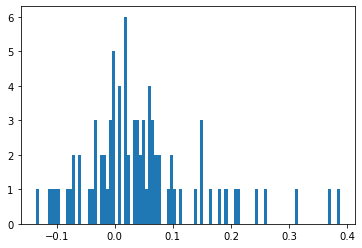

In [35]:
dido_lyrics['score'] = dido_lyrics['lyrics'].apply(score)
print( (dido_lyrics['score'].sum()) / len(dido_lyrics))
plt.hist(dido_lyrics['score'], 100)
dido_lyrics.tail(10)

## Sort Songs by Sentiment

In [36]:
dido_lyrics.sort_values(by='score', ascending=False)

,title,lyrics,score
74,Those Were The Days lyrics,"[kids, wed, know, live, love, forever, blind, ...",0.388060
51,No Freedom lyrics,"[take, silence, im, free, walk, door, look, ey...",0.370000
62,Some Kind Of Love lyrics,"[found, records, lying, underneath, bed, songs...",0.313333
72,This Is Love lyrics,"[well, done, walk, away, take, love, leave, re...",0.262295
4,Cards lyrics,"[oh, baby, baby, baby, happened, days, doors, ...",0.243590
...,...,...,...
81,Worthless lyrics,"[know, came, know, youll, leave, came, heart, ...",-0.098592
67,Take My Hand lyrics,"[touch, ski, tell, youre, thinking, take, hand...",-0.102804
59,See You When You're 40 lyrics,"[ive, driven, round, circles, three, hours, bo...",-0.107143
48,My Life lyrics,"[choose, concern, friends, lay, hat, may, home...",-0.111111


## Above & Beyond Lyric Analysis, Plotting, and Sorting

0.032871503185223416


,title,lyrics,score
53,Sticky Fingers (Acoustic Version) lyrics,"[painted, picture, want, wanted, theres, somet...",-0.155340
54,Sun & Moon lyrics,"[raining, pouring, black, sky, falling, cold, ...",0.054795
55,Sweetest Heart lyrics,"[sweetest, heart]",0.000000
56,Thing Called Love lyrics,"[time, place, fear, inside, witty, line, save,...",-0.067416
57,Tightrope lyrics,"[youre, running, tightrope, theres, empty, sky...",0.000000
58,Treasure lyrics,"[treasure, measured, units, love, means, may, ...",0.200000
59,We're All We Need lyrics,"[tell, place, like, go, say, reach, seize, sor...",0.174419
60,With Your Hope lyrics,"[connected, talk, singing, forest, ice, slow, ...",-0.085714
61,You Gotta Go lyrics,"[dream, little, dreamer, begins, dream, little...",0.130435
62,You Got To Go lyrics,"[dream, little, dreamer, begins, move, feet, f...",0.125000


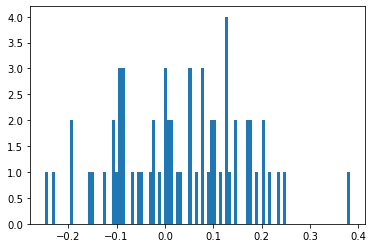

In [37]:
ab_lyrics['score'] = ab_lyrics['lyrics'].apply(score)
print( (ab_lyrics['score'].sum()) / len(ab_lyrics))
plt.hist(ab_lyrics['score'], 100)
ab_lyrics.tail(10)

In [38]:
ab_lyrics.sort_values(by='score', ascending=False)

,title,lyrics,score
24,Good For Me lyrics,"[easy, know, youre, good, feeling, inside, oh,...",0.382353
36,My Own Hymn (Alpha 9 Remix) lyrics,"[confines, photograph, lives, child, oh, see, ...",0.250000
35,My Own Hymn lyrics,"[confines, photograph, lives, child, oooh, see...",0.232558
28,Is It Love? (1001) lyrics,"[love, talk, love, dont, feel, love, talk, lov...",0.214286
58,Treasure lyrics,"[treasure, measured, units, love, means, may, ...",0.200000
...,...,...,...
53,Sticky Fingers (Acoustic Version) lyrics,"[painted, picture, want, wanted, theres, somet...",-0.155340
52,Sticky Fingers lyrics,"[painted, picture, want, wanted, theres, somet...",-0.193182
2,All Over The World lyrics,"[maybe, waited, long, maybe, got, caught, stor...",-0.195652
49,Sink The Lighthouse lyrics,"[comes, calling, temperatures, falling, fear, ...",-0.234043


### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Dido has average sentiment of 0.045 vs 0.032 for Above and Beyond

---

Q: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: For Dido: "Those Were The Days" had the highest sentiment; "Lost" had the lowest.


In [40]:
files_folder = "/users/drzag/lyrics/dido"
high_sentiment_song_df = pd.DataFrame()

# Create a dataframe list and concatenate
file = "C:/users/drzag/lyrics/dido/dido_thosewerethedays.txt"
sentiment_song = [pd.read_csv(file, delimiter='\t')]
sentiment_song_df = pd.concat(sentiment_song, axis = 1)

file = "C:/users/drzag/lyrics/dido/dido_lost.txt"
low_sentiment_song = [pd.read_csv(file, delimiter='\t')]
low_sentiment_song_df = pd.concat(low_sentiment_song, axis = 1)

sentiment_song_df['Lost lyrics'] = low_sentiment_song_df['Lost lyrics']
sentiment_song_df

,Those Were The Days lyrics,Lost lyrics
0,R Plus & Dido Lyrics,Dido Lyrics
1,Those Were The Days,Lost
2,We were kids,However long I'm under makes no difference
3,We'd know it all,However long I'm down there'll be air for me
4,We will live,"All I've had that's lost, that's gone it falls..."
5,We will love forever more,"And I'll come up in my time, there'll be no fe..."
6,We were blind,I walk down this easy path where shadows fall ...
7,So we were free,And rest beneath the trees and wait for me
8,We had no care,"Lost's where I belong, lost's where I've gone"
9,Just doubts,"Lost is my new home, lost's where I belong"



Q: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: For Above & Beyond: "Good for Me" had the highest sentiment; "Black Room Boy" had the lowest.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.


In [41]:
# Create a dataframe list and concatenate
file = "C:/users/drzag/lyrics/abovebeyond/abovebeyond_goodforme.txt"
sentiment_song = [pd.read_csv(file, delimiter='\t')]
sentiment_song_df = pd.concat(sentiment_song, axis = 1)

file = "C:/users/drzag/lyrics/abovebeyond/abovebeyond_blackroomboy.txt"
low_sentiment_song = [pd.read_csv(file, delimiter='\t')]
low_sentiment_song_df = pd.concat(low_sentiment_song, axis = 1)

sentiment_song_df['Black Room Boy lyrics'] = low_sentiment_song_df['Black Room Boy lyrics']
sentiment_song_df

,Good For Me lyrics,Black Room Boy lyrics
0,Above & Beyond Lyrics,Above & Beyond Lyrics
1,Good For Me,Black Room Boy
2,To be with you is easy,(feat. Tony McGuinness & Richard Bedford)
3,I know you're good for me,It's the same old scene
4,This feeling inside me,You've been stuck at the screen for a lifetime
5,Oh it sends me sky high,You keep your mind sharp and clean
6,To feel for you is easy oh baby,With a fix of caffeine for the night time
7,I know you're good for me,You got a page full of friends
8,This feeling inside me,"And a world without end, DIKU?"
9,Oh it sends me sky high,But if push comes to shove


## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

In [46]:
if 'ordinary' in lex4:
    print('Ordinary Found')
    
if 'citizen' in lex4:
    print('Citizen Found')

Citizen Found


In [48]:
def score(text):
    sentiment_score = 0
    if len(text) >= 1:
        for word in text:
            if word in lex4:
                sentiment_score +=lex4[word]
        return sentiment_score / len(text)
    else:
        return sentiment_score

0.09849658590817807


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes,score
100878,Michelle RC,DMEx1977,328246635,"Saskatoon, Saskatchewan, Canad",2011-07-03 01:02:33+00:00,46,331,Proud mother of 3 gorgeous kids! Survived bein...,121,"[proud, mother, of, 3, gorgeous, kids, survive...",0.120000
100879,iamRizu,RizuPak,330845179,Islamabad Pakistan,2011-07-07 07:28:35+00:00,653,1338,http://t.co/39Iw6Pm7yp,22,"[httptco, 39iw6pm7yp]",0.000000
100881,EDM Insider,EDMinsider,301482436,Around The World,2011-05-19 15:02:47+00:00,35986,1844,Get Inside Your Favorite Electronic Dance Musi...,111,"[get, inside, your, favorite, electronic, danc...",0.214286
100882,ΨMonica,ismoketildie,221233701,el infierno,2010-11-30 02:55:51+00:00,590,1617,💀☠yt📽▶ Fotografía ...📷🌃 📒✏🖍Diseño gráfico🎨🖌💻✒🖼...,68,"[💀, ☠, yt, 📽, ▶, fotografía, 📷, 🌃, 📒, ✏, 🖍, di...",0.318182
100883,mohamed ahmed,ezz_edeen,246350180,"mitGhmr.egypt,abuHalifa.kuwait",2011-02-02 16:45:31+00:00,47,162,#Microsoft #web #mobile #developer @fateless,44,"[#microsoft, #web, #mobile, #developer, fateless]",0.000000
100885,Lepka Nicolás,cosassueltas,259305862,Córdoba - Argentina,2011-03-01 15:57:46+00:00,440,680,ilustración y cómics,20,"[ilustración, y, cómics]",0.000000
100886,"tehnicar, RN",rlicul,22473883,"Pula, Croatia",2009-03-02 10:53:53+00:00,146,546,just an ordinary citizen,24,"[just, an, ordinary, citizen]",0.250000
100887,Dina Halasa,DeenZ_H,52514005,London,2009-06-30 20:42:30+00:00,137,156,I rant. Deal with it!,21,"[i, rant, deal, with, it]",0.000000
100889,Mario,Siyam50,177696473,"Tehuacán, Puebla, México",2010-08-12 21:00:04+00:00,107,295,Lic. en Idiomas,15,"[lic, en, idiomas]",0.000000
100891,John *NFFC*,thech1ef,38831906,derbyshire,2009-05-09 10:26:31+00:00,148,210,"I got 3 loves in my life, my Son, NFFC and Rot...",142,"[i, got, 3, loves, in, my, life, my, son, nffc...",0.037037


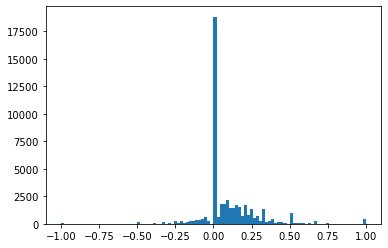

In [44]:
dido_fol['score'] = dido_fol['with_hashes'].apply(score)
print( (dido_fol['score'].sum()) / len(dido_fol))
plt.hist(dido_fol['score'], 100)
dido_fol.tail(10)

0.12901132537874663


,name,handle,id_num,loc,date_joined,followers,friends,desc,desc_len,with_hashes,score
100874,Margaret Brogdon,margaretsbarga1,897535987341045760,"Murfreesboro, TN",2017-08-15 19:10:29+00:00,49,513,"Former Hair Stylist, Instructor, Realtor and P...",86,"[former, hair, stylist, instructor, realtor, a...",0.181818
100876,EnikaO,nikopermana,62956448,Jakarta,2009-08-04 22:59:46+00:00,274,1556,⚡️,2,"[⚡, ️]",0.500000
100877,Meet Modi,Immeet13,780271969031688192,India,2016-09-26 05:05:09+00:00,149,459,Environmentalist 21 ' | Environment & Resource...,90,"[environmentalist, 21, environment, resource, ...",0.181818
100880,Alan James,alanjamesmusic,292350059,Planet Earth,2011-05-03 14:21:49+00:00,18,45,All about the emotion / FSOE,28,"[all, about, the, emotion, fsoe]",0.000000
100881,Francisco A. D'S. F.,falejandrodeso1,3308030764,"Caracas, Distrito Capital, Venezuela",2015-06-04 09:05:52+00:00,330,4998,Redescubriendome como Aspie; Re-descobrindome ...,88,"[redescubriendome, como, aspie, redescobrindom...",0.000000
100882,Kirabira Shakirah,KirabiraShakira,868021382382309376,"Kampala, Uganda",2017-05-26 08:29:59+00:00,55,73,PROFESSIONAL MODEL 📷 email @shakiekira@gmail.c...,89,"[professional, model, 📷, email, shakiekiragmai...",0.333333
100885,Nicole Ende,nickieme17,897344327223050240,"Milford, CT",2017-08-15 06:28:54+00:00,89,824,Motivated entrepreneur/ mom and/ loving girlfr...,50,"[motivated, entrepreneur, mom, and, loving, gi...",0.333333
100887,Ashley,AshnBrady,898161899694682112,"Austin, TX",2017-08-17 12:37:38+00:00,0,2,Signed up for twitter JUST to shoutout on ABGT...,135,"[signed, up, for, twitter, just, to, shoutout,...",0.000000
100888,Daniel Lepko,DanielLepko,898126175217778688,"Copenhagen, Denmark",2017-08-17 10:15:41+00:00,3,120,Always something special.,25,"[always, something, special]",0.333333
100889,ZuB@!r K@k@R,Drinkerkhan,1894357286,Free,2013-09-22 16:43:57+00:00,141,765,Self defender,13,"[self, defender]",0.500000


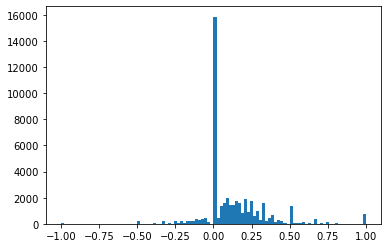

In [47]:
ab_fol['score'] = ab_fol['with_hashes'].apply(score)
print( (ab_fol['score'].sum()) / len(ab_fol))
plt.hist(ab_fol['score'], 100)
ab_fol.tail(10)

In [52]:
from emoji import is_emoji

counter = Counter()
dido_fol['with_hashes'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <100:
        if is_emoji(key) is True:
            print(key, value, emojis_binary_dict.get(key))
            num+=1
    else:
        break

❤ 1707 1
♥ 1076 1
💙 532 1
🏳 443 None
🎶 435 1
✨ 390 1
💜 309 1
⚽ 274 1
🌈 262 1
✌ 216 1
💚 205 1
💕 204 1
🐶 199 1
🎧 198 1
😍 189 1
📚 185 1
💛 182 1
✈ 178 1
🖤 177 None
🎵 163 1
🏴 160 None
💖 159 1
😎 158 1
🌎 156 1
⭐ 154 1
🎮 142 1
☀ 132 1
🔥 129 1
🎸 128 1
⚡ 127 1
😊 121 1
🎤 119 1
🌍 119 1
💫 118 1
☺ 117 1
📸 115 None
🎬 110 1
🌻 108 1
👑 108 1
🌊 107 1
🐾 106 1
☕ 105 1
📷 105 1
🎼 103 1
🤍 100 None
😘 98 1
🌱 97 1
🔴 97 1
🙏 95 1
🎨 94 1
💻 93 1
▪ 92 1
🎥 90 1
😉 86 1
🌸 83 1
🌟 82 1
🍀 82 1
💪 81 1
📍 81 1
🦋 81 None
🎭 80 -1
🎙 79 None
💗 79 1
💯 78 1
🤓 75 None
🌹 74 1
👽 73 1
📺 72 1
🐱 72 1
™ 72 None
🥰 70 None
🏀 69 1
💍 69 1
😇 68 1
🏆 68 1
😁 68 1
🍷 68 1
🐈 67 1
🎓 67 1
🏈 66 1
🌙 65 1
⚪ 64 1
☮ 64 -1
😀 63 1
🦄 62 None
🤘 60 None
🧡 60 None
🌼 59 1
💉 58 1
😂 57 1
🐕 56 1
📖 56 1
🕊 56 None
😜 56 1
🌏 55 1
♊ 55 None
♏ 53 None
👻 53 1
® 52 1
🍃 52 1


In [50]:
from emoji import is_emoji

counter = Counter()
ab_fol['with_hashes'].map(counter.update)
num=0
for key, value in counter.most_common():
    if num <100:
        if is_emoji(key) is True:
            print(key, value, emojis_binary_dict.get(key))
            num+=1
    else:
        break

❤ 1950 1
🎶 1094 1
✨ 1057 1
🎧 912 1
💙 599 1
🏳 587 None
🔥 577 1
😎 548 1
💜 521 1
🖤 468 None
🎵 452 1
😍 428 1
♥ 409 1
⚽ 384 1
🌈 375 1
👽 372 1
💕 371 1
💚 311 1
✌ 286 1
💛 280 1
✈ 266 1
⚡ 263 1
🔊 253 1
🎮 246 1
📸 245 None
🌎 243 1
💖 237 1
🎹 220 1
👻 217 1
📍 213 1
💯 206 1
🎼 196 1
🙏 192 1
💫 192 1
🤍 186 None
☀ 185 1
😊 183 1
🔜 179 1
👑 179 1
🦋 174 None
🐶 170 1
😘 169 1
➡ 162 1
😈 160 1
😉 160 1
▪ 159 1
🌻 157 1
🌙 157 1
⬇ 154 1
🙌 149 1
📚 149 1
🌍 148 1
🏴 147 None
📷 144 1
💪 144 1
🌹 143 1
⭐ 143 1
🚀 143 1
💻 141 1
💍 141 1
😂 137 1
💗 137 1
🔴 131 1
🌸 131 1
🌱 129 1
💋 129 1
☮ 129 -1
🦄 124 None
⚫ 123 1
🥰 123 None
🌞 122 1
♎ 121 -1
⚪ 119 1
🎤 118 1
👇 117 1
🌴 117 1
🌊 116 1
😁 116 1
♊ 114 None
♈ 112 None
♋ 111 None
🦁 111 None
💀 111 -1
👁 110 None
♌ 110 1
🤘 109 None
♏ 109 None
☕ 109 1
😀 106 1
🔮 103 1
🏈 103 1
👾 102 1
🎛 102 None
♉ 101 None
🔞 101 -1
🐾 101 1
🏀 100 1
🎥 99 1
🎸 99 1
😜 99 1


In [61]:
'''
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresses a positive or negative opinion. 
;       See the paper below:
;
;       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in 
;          Handbook of Natural Language Processing, Second Edition, 
;          (editors: N. Indurkhya and F. J. Damerau), 2010.
;
;    2. You will notice many misspelled words in the list. They are not 
;       mistakes. They are included as these misspelled words appear 
;       frequently in social media content. 
;
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
'''


'\n;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n; \n; Opinion Lexicon: Positive\n;\n; This file contains a list of POSITIVE opinion words (or sentiment words).\n;\n; This file and the papers can all be downloaded from \n;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n;\n; If you use this list, please cite one of the following two papers:\n;\n;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n;       Proceedings of the ACM SIGKDD International Conference on Knowledge \n;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n;       Washington, USA, \n;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing \n;       and Comparing Opinions on the Web." Proceedings of the 14th \n;       International World Wide Web conference (WWW-2005), May 10-14, \n;       2005, Chiba, Japan.\n;\n; Notes: \n;    1. The appearance of an opinion word in a sentence does not necessarily  \n;       mean t